# Training the Model

## Keras
Keras is an API built upon TensorFlow that is designed for machine learning. If offers a simple and efficient API that allows for users to develop Artificial Neural Networks without being exposed to the complexities of the underlying architecture. It also provides extensive documentation and developer guides to aid in the development of artificial neural networks for software engineers, data scientists and researchers.

In [1]:
# Neural networks.
import tensorflow.keras as kr

# Numerical arrays
import numpy as np

# Data frames.
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

In [2]:
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

#### Data Set
The provided csv file contains 500 records of windspeed and the corresponding power outputs. This data will be used to train our model to help it predict the power output given a sample windspeed.

In [3]:
# load wind turbine data from csv file
powerdata = np.genfromtxt('powerproduction.csv', delimiter=',', skip_header=1)

#### Data Filtering
The data contains a number of records that have zero values. While these could be left in place for the purpose of training our model to reflect more realistic input data. It is often the case that things are never perfect under real-world conditions, so including these records would help simulate a live system that is prone to error. However, we will remove these values to train our model to a higher level of accuracy that reflects a system under perfect operating conditions.

In [4]:
# mask all 0 value records from the dataset to remove outliers
row_mask = (powerdata != 0).all(axis=1)
# store in new array
filteredData = powerdata[row_mask,:]

In [5]:
# Create a training data frame with x and y values.
train = pd.DataFrame()
train['Speed'] = filteredData[:,0]
train['Power'] = filteredData[:,1]
train

,Speed,Power
0,0.325,4.331
1,0.400,5.186
2,0.450,3.826
3,0.501,1.048
4,0.526,5.553
...,...,...
446,24.249,103.700
447,24.299,93.694
448,24.349,93.078
449,24.374,98.223


#### Artificial Neural Network
We will train our model with a multi-layered neural network and use the mean squared error as the basis of evaluation for the training process. The network contains an input layer consisting one neuron, two hidden layers consisting of three neurons each and finally an output layer of one neuron.

The weights and bias between each layer will be set to randomised values to allow the artificial neural network to train itself without any form of human intervention. As the relationship between the windspeed and power output in non-linear, we will use a sigmoid activation function on the hidden layers. Then use a linear activation function on the output layer to return a normalised output.

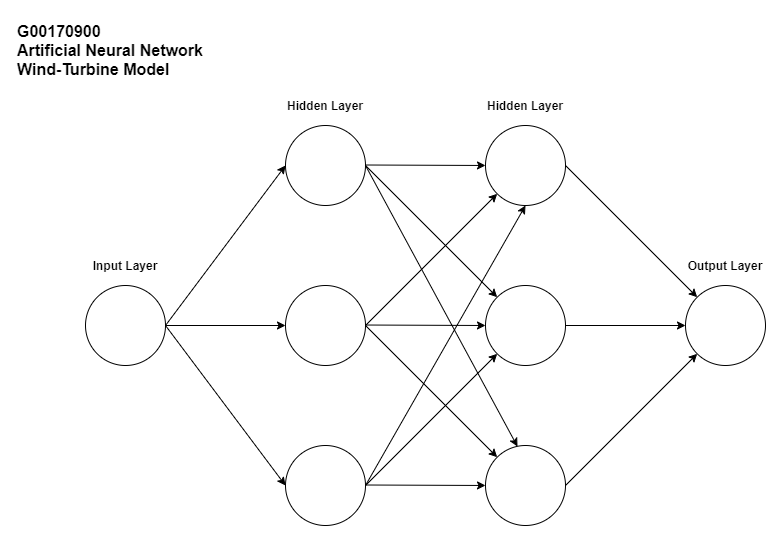

In [6]:
# Create a neural network with two hidden layers and one output layer.
model = kr.models.Sequential()
# first hidden layer with 3 neurons and sigmoid activation
model.add(kr.layers.Dense(3, input_shape=(1,), activation="sigmoid", kernel_initializer='random_normal', bias_initializer='random_normal'))
# second hidden layer with 3 neurons and sigmoid activation
model.add(kr.layers.Dense(3, input_shape=(3,), activation="sigmoid", kernel_initializer='random_normal', bias_initializer='random_normal'))
# output layer with one neuron and linear activation
model.add(kr.layers.Dense(1, input_shape=(3,), activation="linear", kernel_initializer='random_normal', bias_initializer='random_normal'))
# build nuural network
model.compile('adam', loss='mean_squared_error')

In [7]:
# Train the neural network using the training data.
model.fit(train['Speed'], train['Power'], epochs=5000)

Epoch 1/5000
15/15 [==============================] - 0s 1ms/step - loss: 4476.2593
Epoch 2/5000
15/15 [==============================] - 0s 876us/step - loss: 4472.1255
Epoch 3/5000
15/15 [==============================] - 0s 1ms/step - loss: 4468.1069
Epoch 4/5000
15/15 [==============================] - 0s 1ms/step - loss: 4463.9761
Epoch 5/5000
15/15 [==============================] - 0s 1ms/step - loss: 4459.6128
Epoch 6/5000
15/15 [==============================] - 0s 1ms/step - loss: 4455.0674
Epoch 7/5000
15/15 [==============================] - 0s 1ms/step - loss: 4450.1904
Epoch 8/5000
15/15 [==============================] - 0s 1ms/step - loss: 4445.0020
Epoch 9/5000
15/15 [==============================] - ETA: 0s - loss: 5240.74 - 0s 1ms/step - loss: 4439.4624
Epoch 10/5000
15/15 [==============================] - 0s 1ms/step - loss: 4433.6621
Epoch 11/5000
15/15 [==============================] - 0s 1ms/step - loss: 4427.7319
Epoch 12/5000
15/15 [=========================

15/15 [==============================] - 0s 1ms/step - loss: 3881.1853
Epoch 96/5000
15/15 [==============================] - 0s 1ms/step - loss: 3875.6719
Epoch 97/5000
15/15 [==============================] - 0s 1000us/step - loss: 3870.2397
Epoch 98/5000
15/15 [==============================] - 0s 933us/step - loss: 3864.6272
Epoch 99/5000
15/15 [==============================] - 0s 866us/step - loss: 3859.0371
Epoch 100/5000
15/15 [==============================] - 0s 1000us/step - loss: 3853.5771
Epoch 101/5000
15/15 [==============================] - 0s 800us/step - loss: 3848.2659
Epoch 102/5000
15/15 [==============================] - 0s 867us/step - loss: 3842.8835
Epoch 103/5000
15/15 [==============================] - 0s 1000us/step - loss: 3837.5239
Epoch 104/5000
15/15 [==============================] - 0s 1ms/step - loss: 3832.0762
Epoch 105/5000
15/15 [==============================] - 0s 933us/step - loss: 3826.6277
Epoch 106/5000
15/15 [==============================] 

15/15 [==============================] - 0s 1000us/step - loss: 3411.3369
Epoch 188/5000
15/15 [==============================] - 0s 933us/step - loss: 3406.7742
Epoch 189/5000
15/15 [==============================] - 0s 1000us/step - loss: 3402.1499
Epoch 190/5000
15/15 [==============================] - 0s 933us/step - loss: 3397.3572
Epoch 191/5000
15/15 [==============================] - 0s 934us/step - loss: 3392.6973
Epoch 192/5000
15/15 [==============================] - 0s 933us/step - loss: 3388.0869
Epoch 193/5000
15/15 [==============================] - 0s 866us/step - loss: 3383.4778
Epoch 194/5000
15/15 [==============================] - 0s 867us/step - loss: 3379.1863
Epoch 195/5000
15/15 [==============================] - 0s 1ms/step - loss: 3374.6914
Epoch 196/5000
15/15 [==============================] - 0s 867us/step - loss: 3370.3403
Epoch 197/5000
15/15 [==============================] - 0s 933us/step - loss: 3365.7109
Epoch 198/5000
15/15 [=========================

15/15 [==============================] - 0s 999us/step - loss: 3000.5579
Epoch 281/5000
15/15 [==============================] - 0s 1000us/step - loss: 2996.3342
Epoch 282/5000
15/15 [==============================] - 0s 867us/step - loss: 2992.2432
Epoch 283/5000
15/15 [==============================] - 0s 866us/step - loss: 2988.1558
Epoch 284/5000
15/15 [==============================] - 0s 1000us/step - loss: 2983.8220
Epoch 285/5000
15/15 [==============================] - 0s 933us/step - loss: 2979.4661
Epoch 286/5000
15/15 [==============================] - 0s 1ms/step - loss: 2975.0566
Epoch 287/5000
15/15 [==============================] - 0s 933us/step - loss: 2970.6248
Epoch 288/5000
15/15 [==============================] - 0s 933us/step - loss: 2966.3071
Epoch 289/5000
15/15 [==============================] - 0s 1000us/step - loss: 2961.9302
Epoch 290/5000
15/15 [==============================] - 0s 1000us/step - loss: 2957.5159
Epoch 291/5000
15/15 [=======================

Epoch 373/5000
15/15 [==============================] - 0s 1000us/step - loss: 2591.7095
Epoch 374/5000
15/15 [==============================] - 0s 933us/step - loss: 2587.3823
Epoch 375/5000
15/15 [==============================] - 0s 867us/step - loss: 2583.1704
Epoch 376/5000
15/15 [==============================] - 0s 866us/step - loss: 2578.9209
Epoch 377/5000
15/15 [==============================] - 0s 867us/step - loss: 2574.6565
Epoch 378/5000
15/15 [==============================] - 0s 800us/step - loss: 2570.4419
Epoch 379/5000
15/15 [==============================] - 0s 1ms/step - loss: 2566.4072
Epoch 380/5000
15/15 [==============================] - 0s 933us/step - loss: 2562.1687
Epoch 381/5000
15/15 [==============================] - 0s 933us/step - loss: 2557.8621
Epoch 382/5000
15/15 [==============================] - 0s 933us/step - loss: 2553.5208
Epoch 383/5000
15/15 [==============================] - 0s 933us/step - loss: 2549.1145
Epoch 384/5000
15/15 [===========

15/15 [==============================] - 0s 1000us/step - loss: 2219.3633
Epoch 466/5000
15/15 [==============================] - 0s 1ms/step - loss: 2215.6245
Epoch 467/5000
15/15 [==============================] - 0s 933us/step - loss: 2211.7341
Epoch 468/5000
15/15 [==============================] - 0s 933us/step - loss: 2208.0942
Epoch 469/5000
15/15 [==============================] - 0s 933us/step - loss: 2204.3267
Epoch 470/5000
15/15 [==============================] - 0s 933us/step - loss: 2200.5046
Epoch 471/5000
15/15 [==============================] - 0s 1000us/step - loss: 2196.5681
Epoch 472/5000
15/15 [==============================] - 0s 933us/step - loss: 2192.5791
Epoch 473/5000
15/15 [==============================] - 0s 1ms/step - loss: 2188.6694
Epoch 474/5000
15/15 [==============================] - 0s 866us/step - loss: 2184.8855
Epoch 475/5000
15/15 [==============================] - 0s 933us/step - loss: 2181.3120
Epoch 476/5000
15/15 [===========================

15/15 [==============================] - 0s 1ms/step - loss: 1884.6384
Epoch 559/5000
15/15 [==============================] - 0s 1ms/step - loss: 1881.0796
Epoch 560/5000
15/15 [==============================] - 0s 1000us/step - loss: 1877.7070
Epoch 561/5000
15/15 [==============================] - 0s 1ms/step - loss: 1874.4299
Epoch 562/5000
15/15 [==============================] - 0s 933us/step - loss: 1870.9889
Epoch 563/5000
15/15 [==============================] - 0s 933us/step - loss: 1867.6171
Epoch 564/5000
15/15 [==============================] - 0s 867us/step - loss: 1864.2725
Epoch 565/5000
15/15 [==============================] - 0s 933us/step - loss: 1860.9675
Epoch 566/5000
15/15 [==============================] - 0s 1000us/step - loss: 1857.5459
Epoch 567/5000
15/15 [==============================] - 0s 1ms/step - loss: 1854.2594
Epoch 568/5000
15/15 [==============================] - 0s 933us/step - loss: 1850.9537
Epoch 569/5000
15/15 [==============================]

Epoch 651/5000
15/15 [==============================] - 0s 1ms/step - loss: 1586.1066
Epoch 652/5000
15/15 [==============================] - 0s 933us/step - loss: 1583.0544
Epoch 653/5000
15/15 [==============================] - 0s 933us/step - loss: 1579.9950
Epoch 654/5000
15/15 [==============================] - 0s 933us/step - loss: 1577.0259
Epoch 655/5000
15/15 [==============================] - 0s 933us/step - loss: 1573.9695
Epoch 656/5000
15/15 [==============================] - 0s 866us/step - loss: 1570.9692
Epoch 657/5000
15/15 [==============================] - 0s 933us/step - loss: 1568.2155
Epoch 658/5000
15/15 [==============================] - 0s 866us/step - loss: 1565.0656
Epoch 659/5000
15/15 [==============================] - 0s 867us/step - loss: 1561.7985
Epoch 660/5000
15/15 [==============================] - 0s 1000us/step - loss: 1558.7306
Epoch 661/5000
15/15 [==============================] - 0s 933us/step - loss: 1555.6887
Epoch 662/5000
15/15 [===========

Epoch 744/5000
15/15 [==============================] - 0s 1ms/step - loss: 1320.2725
Epoch 745/5000
15/15 [==============================] - 0s 1ms/step - loss: 1317.5438
Epoch 746/5000
15/15 [==============================] - 0s 1000us/step - loss: 1314.9235
Epoch 747/5000
15/15 [==============================] - 0s 933us/step - loss: 1312.3824
Epoch 748/5000
15/15 [==============================] - 0s 933us/step - loss: 1309.5767
Epoch 749/5000
15/15 [==============================] - 0s 867us/step - loss: 1306.8156
Epoch 750/5000
15/15 [==============================] - 0s 866us/step - loss: 1304.1117
Epoch 751/5000
15/15 [==============================] - 0s 933us/step - loss: 1301.5623
Epoch 752/5000
15/15 [==============================] - 0s 933us/step - loss: 1298.7255
Epoch 753/5000
15/15 [==============================] - 0s 931us/step - loss: 1296.2212
Epoch 754/5000
15/15 [==============================] - 0s 933us/step - loss: 1293.6221
Epoch 755/5000
15/15 [=============

15/15 [==============================] - 0s 933us/step - loss: 1087.2061
Epoch 838/5000
15/15 [==============================] - 0s 1ms/step - loss: 1084.8799
Epoch 839/5000
15/15 [==============================] - 0s 1ms/step - loss: 1082.5723
Epoch 840/5000
15/15 [==============================] - 0s 1000us/step - loss: 1080.2159
Epoch 841/5000
15/15 [==============================] - 0s 933us/step - loss: 1078.0081
Epoch 842/5000
15/15 [==============================] - 0s 933us/step - loss: 1075.6310
Epoch 843/5000
15/15 [==============================] - 0s 933us/step - loss: 1073.2966
Epoch 844/5000
15/15 [==============================] - 0s 933us/step - loss: 1071.0552
Epoch 845/5000
15/15 [==============================] - 0s 866us/step - loss: 1068.6432
Epoch 846/5000
15/15 [==============================] - 0s 1ms/step - loss: 1066.2793
Epoch 847/5000
15/15 [==============================] - 0s 800us/step - loss: 1063.9065
Epoch 848/5000
15/15 [==============================

Epoch 931/5000
15/15 [==============================] - 0s 1000us/step - loss: 881.8713
Epoch 932/5000
15/15 [==============================] - 0s 933us/step - loss: 879.8854
Epoch 933/5000
15/15 [==============================] - 0s 866us/step - loss: 877.9941
Epoch 934/5000
15/15 [==============================] - 0s 867us/step - loss: 876.0491
Epoch 935/5000
15/15 [==============================] - 0s 933us/step - loss: 874.0378
Epoch 936/5000
15/15 [==============================] - 0s 933us/step - loss: 872.0087
Epoch 937/5000
15/15 [==============================] - 0s 933us/step - loss: 870.1814
Epoch 938/5000
15/15 [==============================] - 0s 1000us/step - loss: 868.1906
Epoch 939/5000
15/15 [==============================] - 0s 933us/step - loss: 866.2617
Epoch 940/5000
15/15 [==============================] - 0s 1000us/step - loss: 864.2142
Epoch 941/5000
15/15 [==============================] - 0s 866us/step - loss: 862.1615
Epoch 942/5000
15/15 [==================

15/15 [==============================] - 0s 1000us/step - loss: 707.9201
Epoch 1025/5000
15/15 [==============================] - 0s 1000us/step - loss: 706.1084
Epoch 1026/5000
15/15 [==============================] - 0s 1ms/step - loss: 704.3196
Epoch 1027/5000
15/15 [==============================] - 0s 1000us/step - loss: 702.6024
Epoch 1028/5000
15/15 [==============================] - 0s 933us/step - loss: 700.9308
Epoch 1029/5000
15/15 [==============================] - 0s 933us/step - loss: 699.2972
Epoch 1030/5000
15/15 [==============================] - 0s 933us/step - loss: 697.6308
Epoch 1031/5000
15/15 [==============================] - 0s 933us/step - loss: 695.9080
Epoch 1032/5000
15/15 [==============================] - 0s 1ms/step - loss: 694.3159
Epoch 1033/5000
15/15 [==============================] - 0s 933us/step - loss: 692.6787
Epoch 1034/5000
15/15 [==============================] - 0s 933us/step - loss: 690.8914
Epoch 1035/5000
15/15 [==========================

15/15 [==============================] - 0s 1000us/step - loss: 560.0172
Epoch 1118/5000
15/15 [==============================] - 0s 1000us/step - loss: 558.6624
Epoch 1119/5000
15/15 [==============================] - 0s 1000us/step - loss: 557.0682
Epoch 1120/5000
15/15 [==============================] - 0s 933us/step - loss: 555.6377
Epoch 1121/5000
15/15 [==============================] - 0s 866us/step - loss: 554.1584
Epoch 1122/5000
15/15 [==============================] - 0s 998us/step - loss: 552.7368
Epoch 1123/5000
15/15 [==============================] - 0s 1000us/step - loss: 551.3049
Epoch 1124/5000
15/15 [==============================] - 0s 1ms/step - loss: 549.9186
Epoch 1125/5000
15/15 [==============================] - 0s 933us/step - loss: 548.2978
Epoch 1126/5000
15/15 [==============================] - 0s 933us/step - loss: 546.8584
Epoch 1127/5000
15/15 [==============================] - 0s 933us/step - loss: 545.4156
Epoch 1128/5000
15/15 [=======================

15/15 [==============================] - 0s 866us/step - loss: 437.5009
Epoch 1211/5000
15/15 [==============================] - 0s 1ms/step - loss: 436.3643
Epoch 1212/5000
15/15 [==============================] - 0s 933us/step - loss: 435.2372
Epoch 1213/5000
15/15 [==============================] - 0s 1ms/step - loss: 434.1054
Epoch 1214/5000
15/15 [==============================] - 0s 867us/step - loss: 432.8723
Epoch 1215/5000
15/15 [==============================] - 0s 933us/step - loss: 431.6095
Epoch 1216/5000
15/15 [==============================] - 0s 933us/step - loss: 430.4614
Epoch 1217/5000
15/15 [==============================] - 0s 998us/step - loss: 429.3088
Epoch 1218/5000
15/15 [==============================] - 0s 1000us/step - loss: 428.1418
Epoch 1219/5000
15/15 [==============================] - 0s 1000us/step - loss: 427.0266
Epoch 1220/5000
15/15 [==============================] - 0s 1000us/step - loss: 425.9281
Epoch 1221/5000
15/15 [==========================

15/15 [==============================] - 0s 933us/step - loss: 337.8037
Epoch 1304/5000
15/15 [==============================] - 0s 1ms/step - loss: 336.8060
Epoch 1305/5000
15/15 [==============================] - 0s 1000us/step - loss: 335.9430
Epoch 1306/5000
15/15 [==============================] - 0s 933us/step - loss: 335.0087
Epoch 1307/5000
15/15 [==============================] - 0s 933us/step - loss: 334.1879
Epoch 1308/5000
15/15 [==============================] - 0s 1000us/step - loss: 333.1201
Epoch 1309/5000
15/15 [==============================] - 0s 933us/step - loss: 332.2455
Epoch 1310/5000
15/15 [==============================] - 0s 933us/step - loss: 331.2519
Epoch 1311/5000
15/15 [==============================] - 0s 933us/step - loss: 330.5338
Epoch 1312/5000
15/15 [==============================] - 0s 867us/step - loss: 329.5308
Epoch 1313/5000
15/15 [==============================] - 0s 933us/step - loss: 328.7694
Epoch 1314/5000
15/15 [=========================

15/15 [==============================] - 0s 933us/step - loss: 261.3233
Epoch 1397/5000
15/15 [==============================] - 0s 933us/step - loss: 260.6047
Epoch 1398/5000
15/15 [==============================] - 0s 1ms/step - loss: 259.8735
Epoch 1399/5000
15/15 [==============================] - ETA: 0s - loss: 223.849 - 0s 1000us/step - loss: 259.1273
Epoch 1400/5000
15/15 [==============================] - 0s 933us/step - loss: 258.3606
Epoch 1401/5000
15/15 [==============================] - 0s 933us/step - loss: 257.6453
Epoch 1402/5000
15/15 [==============================] - 0s 866us/step - loss: 256.9342
Epoch 1403/5000
15/15 [==============================] - 0s 1000us/step - loss: 256.2006
Epoch 1404/5000
15/15 [==============================] - 0s 1000us/step - loss: 255.5078
Epoch 1405/5000
15/15 [==============================] - 0s 931us/step - loss: 254.7882
Epoch 1406/5000
15/15 [==============================] - 0s 933us/step - loss: 254.1104
Epoch 1407/5000
15/15

15/15 [==============================] - 0s 1000us/step - loss: 204.1133
Epoch 1489/5000
15/15 [==============================] - 0s 1ms/step - loss: 203.4372
Epoch 1490/5000
15/15 [==============================] - 0s 866us/step - loss: 202.9521
Epoch 1491/5000
15/15 [==============================] - 0s 866us/step - loss: 202.4224
Epoch 1492/5000
15/15 [==============================] - 0s 866us/step - loss: 201.9062
Epoch 1493/5000
15/15 [==============================] - 0s 933us/step - loss: 201.4334
Epoch 1494/5000
15/15 [==============================] - 0s 1000us/step - loss: 200.9177
Epoch 1495/5000
15/15 [==============================] - 0s 933us/step - loss: 200.5137
Epoch 1496/5000
15/15 [==============================] - 0s 1000us/step - loss: 199.8430
Epoch 1497/5000
15/15 [==============================] - 0s 933us/step - loss: 199.3306
Epoch 1498/5000
15/15 [==============================] - 0s 933us/step - loss: 198.8172
Epoch 1499/5000
15/15 [========================

15/15 [==============================] - 0s 1ms/step - loss: 161.4368
Epoch 1583/5000
15/15 [==============================] - 0s 1ms/step - loss: 161.0883
Epoch 1584/5000
15/15 [==============================] - 0s 1ms/step - loss: 160.7410
Epoch 1585/5000
15/15 [==============================] - 0s 1ms/step - loss: 160.3871
Epoch 1586/5000
15/15 [==============================] - 0s 1ms/step - loss: 160.0736
Epoch 1587/5000
15/15 [==============================] - 0s 1ms/step - loss: 159.7518
Epoch 1588/5000
15/15 [==============================] - 0s 1ms/step - loss: 159.2536
Epoch 1589/5000
15/15 [==============================] - 0s 1ms/step - loss: 158.9042
Epoch 1590/5000
15/15 [==============================] - 0s 1ms/step - loss: 158.5112
Epoch 1591/5000
15/15 [==============================] - 0s 1ms/step - loss: 158.1888
Epoch 1592/5000
15/15 [==============================] - 0s 1000us/step - loss: 157.8338
Epoch 1593/5000
15/15 [==============================] - 0s 1ms/ste

15/15 [==============================] - 0s 1ms/step - loss: 130.6922
Epoch 1677/5000
15/15 [==============================] - 0s 1ms/step - loss: 130.4525
Epoch 1678/5000
15/15 [==============================] - 0s 1ms/step - loss: 130.3495
Epoch 1679/5000
15/15 [==============================] - 0s 1ms/step - loss: 129.8635
Epoch 1680/5000
15/15 [==============================] - 0s 1ms/step - loss: 129.6497
Epoch 1681/5000
15/15 [==============================] - 0s 1ms/step - loss: 129.3092
Epoch 1682/5000
15/15 [==============================] - 0s 933us/step - loss: 129.0391
Epoch 1683/5000
15/15 [==============================] - 0s 1ms/step - loss: 128.7286
Epoch 1684/5000
15/15 [==============================] - 0s 1000us/step - loss: 128.5687
Epoch 1685/5000
15/15 [==============================] - 0s 1ms/step - loss: 128.3009
Epoch 1686/5000
15/15 [==============================] - 0s 1000us/step - loss: 128.0015
Epoch 1687/5000
15/15 [==============================] - 0s 10

15/15 [==============================] - 0s 999us/step - loss: 107.0919
Epoch 1771/5000
15/15 [==============================] - 0s 1ms/step - loss: 106.9568
Epoch 1772/5000
15/15 [==============================] - 0s 1ms/step - loss: 106.6311
Epoch 1773/5000
15/15 [==============================] - 0s 1ms/step - loss: 106.4835
Epoch 1774/5000
15/15 [==============================] - 0s 1000us/step - loss: 106.1503
Epoch 1775/5000
15/15 [==============================] - 0s 1ms/step - loss: 106.0173
Epoch 1776/5000
15/15 [==============================] - 0s 1ms/step - loss: 105.8359
Epoch 1777/5000
15/15 [==============================] - 0s 999us/step - loss: 105.4972
Epoch 1778/5000
15/15 [==============================] - 0s 1ms/step - loss: 105.4168
Epoch 1779/5000
15/15 [==============================] - 0s 1ms/step - loss: 105.0443
Epoch 1780/5000
15/15 [==============================] - 0s 863us/step - loss: 104.8321
Epoch 1781/5000
15/15 [==============================] - 0s 1

15/15 [==============================] - 0s 1ms/step - loss: 87.1704
Epoch 1866/5000
15/15 [==============================] - 0s 1000us/step - loss: 87.0421
Epoch 1867/5000
15/15 [==============================] - 0s 1ms/step - loss: 86.8239
Epoch 1868/5000
15/15 [==============================] - 0s 1ms/step - loss: 86.6843
Epoch 1869/5000
15/15 [==============================] - 0s 1ms/step - loss: 86.4431
Epoch 1870/5000
15/15 [==============================] - 0s 1ms/step - loss: 86.1899
Epoch 1871/5000
15/15 [==============================] - 0s 1ms/step - loss: 86.0287
Epoch 1872/5000
15/15 [==============================] - 0s 1ms/step - loss: 86.0436
Epoch 1873/5000
15/15 [==============================] - 0s 1000us/step - loss: 85.7460
Epoch 1874/5000
15/15 [==============================] - 0s 1ms/step - loss: 85.4379
Epoch 1875/5000
15/15 [==============================] - 0s 1ms/step - loss: 85.2477
Epoch 1876/5000
15/15 [==============================] - 0s 1ms/step - loss

15/15 [==============================] - 0s 1ms/step - loss: 70.4452
Epoch 1962/5000
15/15 [==============================] - 0s 1ms/step - loss: 70.3439
Epoch 1963/5000
15/15 [==============================] - 0s 1000us/step - loss: 70.2812
Epoch 1964/5000
15/15 [==============================] - 0s 864us/step - loss: 70.1053
Epoch 1965/5000
15/15 [==============================] - 0s 1ms/step - loss: 70.0006
Epoch 1966/5000
15/15 [==============================] - 0s 1ms/step - loss: 69.7529
Epoch 1967/5000
15/15 [==============================] - 0s 1ms/step - loss: 69.5709
Epoch 1968/5000
15/15 [==============================] - 0s 1000us/step - loss: 69.4205
Epoch 1969/5000
15/15 [==============================] - 0s 1ms/step - loss: 69.2588
Epoch 1970/5000
15/15 [==============================] - 0s 1ms/step - loss: 69.1076
Epoch 1971/5000
15/15 [==============================] - 0s 1000us/step - loss: 68.9382
Epoch 1972/5000
15/15 [==============================] - 0s 1000us/ste

15/15 [==============================] - 0s 1ms/step - loss: 57.3792
Epoch 2057/5000
15/15 [==============================] - 0s 1ms/step - loss: 57.1641
Epoch 2058/5000
15/15 [==============================] - 0s 1000us/step - loss: 57.0879
Epoch 2059/5000
15/15 [==============================] - 0s 1000us/step - loss: 57.1457
Epoch 2060/5000
15/15 [==============================] - ETA: 0s - loss: 44.61 - 0s 866us/step - loss: 56.9913
Epoch 2061/5000
15/15 [==============================] - 0s 1ms/step - loss: 56.8576
Epoch 2062/5000
15/15 [==============================] - 0s 1ms/step - loss: 56.6286
Epoch 2063/5000
15/15 [==============================] - 0s 1ms/step - loss: 56.5175
Epoch 2064/5000
15/15 [==============================] - 0s 1ms/step - loss: 56.3212
Epoch 2065/5000
15/15 [==============================] - 0s 866us/step - loss: 56.4318
Epoch 2066/5000
15/15 [==============================] - 0s 1ms/step - loss: 56.1776
Epoch 2067/5000
15/15 [========================

15/15 [==============================] - 0s 1ms/step - loss: 47.2156
Epoch 2152/5000
15/15 [==============================] - 0s 1ms/step - loss: 47.2726
Epoch 2153/5000
15/15 [==============================] - 0s 1000us/step - loss: 46.9909
Epoch 2154/5000
15/15 [==============================] - 0s 933us/step - loss: 47.5004
Epoch 2155/5000
15/15 [==============================] - 0s 1000us/step - loss: 46.8517
Epoch 2156/5000
15/15 [==============================] - 0s 867us/step - loss: 46.7667
Epoch 2157/5000
15/15 [==============================] - 0s 865us/step - loss: 46.7462
Epoch 2158/5000
15/15 [==============================] - 0s 933us/step - loss: 46.5277
Epoch 2159/5000
15/15 [==============================] - 0s 934us/step - loss: 46.4691
Epoch 2160/5000
15/15 [==============================] - 0s 933us/step - loss: 46.3684
Epoch 2161/5000
15/15 [==============================] - 0s 933us/step - loss: 46.3786
Epoch 2162/5000
15/15 [==============================] - 0s 1

15/15 [==============================] - 0s 1000us/step - loss: 39.5971
Epoch 2246/5000
15/15 [==============================] - 0s 1ms/step - loss: 39.4618
Epoch 2247/5000
15/15 [==============================] - 0s 933us/step - loss: 39.4263
Epoch 2248/5000
15/15 [==============================] - 0s 933us/step - loss: 39.4436
Epoch 2249/5000
15/15 [==============================] - 0s 867us/step - loss: 39.2623
Epoch 2250/5000
15/15 [==============================] - 0s 866us/step - loss: 39.2010
Epoch 2251/5000
15/15 [==============================] - 0s 933us/step - loss: 39.1426
Epoch 2252/5000
15/15 [==============================] - 0s 999us/step - loss: 39.0538
Epoch 2253/5000
15/15 [==============================] - 0s 933us/step - loss: 38.9766
Epoch 2254/5000
15/15 [==============================] - 0s 933us/step - loss: 38.8940
Epoch 2255/5000
15/15 [==============================] - 0s 1000us/step - loss: 38.8346
Epoch 2256/5000
15/15 [==============================] - 0s

15/15 [==============================] - 0s 1ms/step - loss: 33.6090
Epoch 2340/5000
15/15 [==============================] - 0s 1ms/step - loss: 33.5408
Epoch 2341/5000
15/15 [==============================] - 0s 1000us/step - loss: 33.5709
Epoch 2342/5000
15/15 [==============================] - 0s 1000us/step - loss: 33.4866
Epoch 2343/5000
15/15 [==============================] - 0s 1000us/step - loss: 33.4105
Epoch 2344/5000
15/15 [==============================] - 0s 867us/step - loss: 33.3566
Epoch 2345/5000
15/15 [==============================] - 0s 1000us/step - loss: 33.3551
Epoch 2346/5000
15/15 [==============================] - 0s 866us/step - loss: 33.4752
Epoch 2347/5000
15/15 [==============================] - 0s 2ms/step - loss: 33.4000
Epoch 2348/5000
15/15 [==============================] - 0s 1ms/step - loss: 33.1135
Epoch 2349/5000
15/15 [==============================] - 0s 933us/step - loss: 33.0772
Epoch 2350/5000
15/15 [==============================] - 0s 933

15/15 [==============================] - 0s 1000us/step - loss: 29.1458
Epoch 2434/5000
15/15 [==============================] - 0s 1ms/step - loss: 28.9222
Epoch 2435/5000
15/15 [==============================] - 0s 1ms/step - loss: 28.9618
Epoch 2436/5000
15/15 [==============================] - 0s 933us/step - loss: 28.8598
Epoch 2437/5000
15/15 [==============================] - 0s 933us/step - loss: 28.8792
Epoch 2438/5000
15/15 [==============================] - 0s 1000us/step - loss: 28.8150
Epoch 2439/5000
15/15 [==============================] - 0s 866us/step - loss: 28.8034
Epoch 2440/5000
15/15 [==============================] - 0s 1ms/step - loss: 28.7269
Epoch 2441/5000
15/15 [==============================] - 0s 934us/step - loss: 28.6656
Epoch 2442/5000
15/15 [==============================] - 0s 1000us/step - loss: 28.6004
Epoch 2443/5000
15/15 [==============================] - 0s 999us/step - loss: 28.6617
Epoch 2444/5000
15/15 [==============================] - 0s 10

15/15 [==============================] - 0s 933us/step - loss: 25.4902
Epoch 2528/5000
15/15 [==============================] - 0s 1000us/step - loss: 25.6089
Epoch 2529/5000
15/15 [==============================] - 0s 999us/step - loss: 25.4736
Epoch 2530/5000
15/15 [==============================] - 0s 933us/step - loss: 25.3712
Epoch 2531/5000
15/15 [==============================] - 0s 1ms/step - loss: 25.3355
Epoch 2532/5000
15/15 [==============================] - 0s 866us/step - loss: 25.3561
Epoch 2533/5000
15/15 [==============================] - 0s 1000us/step - loss: 25.3162
Epoch 2534/5000
15/15 [==============================] - 0s 1000us/step - loss: 25.2911
Epoch 2535/5000
15/15 [==============================] - 0s 933us/step - loss: 25.5175
Epoch 2536/5000
15/15 [==============================] - 0s 1000us/step - loss: 25.1255
Epoch 2537/5000
15/15 [==============================] - 0s 933us/step - loss: 25.2396
Epoch 2538/5000
15/15 [==============================] - 

15/15 [==============================] - 0s 1000us/step - loss: 22.8637
Epoch 2622/5000
15/15 [==============================] - 0s 1ms/step - loss: 22.8351
Epoch 2623/5000
15/15 [==============================] - 0s 866us/step - loss: 22.8175
Epoch 2624/5000
15/15 [==============================] - 0s 933us/step - loss: 22.7701
Epoch 2625/5000
15/15 [==============================] - 0s 867us/step - loss: 22.8177
Epoch 2626/5000
15/15 [==============================] - 0s 1ms/step - loss: 22.7056
Epoch 2627/5000
15/15 [==============================] - 0s 1000us/step - loss: 22.6946
Epoch 2628/5000
15/15 [==============================] - 0s 933us/step - loss: 22.6380
Epoch 2629/5000
15/15 [==============================] - 0s 1000us/step - loss: 22.6759
Epoch 2630/5000
15/15 [==============================] - 0s 933us/step - loss: 22.6475
Epoch 2631/5000
15/15 [==============================] - 0s 933us/step - loss: 22.5632
Epoch 2632/5000
15/15 [==============================] - 0s 

15/15 [==============================] - 0s 1000us/step - loss: 20.8388
Epoch 2716/5000
15/15 [==============================] - 0s 1000us/step - loss: 20.7717
Epoch 2717/5000
15/15 [==============================] - 0s 933us/step - loss: 20.7272
Epoch 2718/5000
15/15 [==============================] - 0s 1000us/step - loss: 20.7391
Epoch 2719/5000
15/15 [==============================] - 0s 933us/step - loss: 20.7779
Epoch 2720/5000
15/15 [==============================] - 0s 866us/step - loss: 20.7057
Epoch 2721/5000
15/15 [==============================] - 0s 867us/step - loss: 20.6282
Epoch 2722/5000
15/15 [==============================] - 0s 933us/step - loss: 20.6854
Epoch 2723/5000
15/15 [==============================] - 0s 933us/step - loss: 20.6978
Epoch 2724/5000
15/15 [==============================] - 0s 933us/step - loss: 20.6817
Epoch 2725/5000
15/15 [==============================] - 0s 1000us/step - loss: 20.5704
Epoch 2726/5000
15/15 [==============================] 

15/15 [==============================] - 0s 1000us/step - loss: 19.3527
Epoch 2810/5000
15/15 [==============================] - 0s 1000us/step - loss: 19.3211
Epoch 2811/5000
15/15 [==============================] - 0s 1000us/step - loss: 19.3686
Epoch 2812/5000
15/15 [==============================] - 0s 933us/step - loss: 19.2510
Epoch 2813/5000
15/15 [==============================] - 0s 933us/step - loss: 19.2538
Epoch 2814/5000
15/15 [==============================] - 0s 1000us/step - loss: 19.4090
Epoch 2815/5000
15/15 [==============================] - 0s 933us/step - loss: 19.4236
Epoch 2816/5000
15/15 [==============================] - 0s 866us/step - loss: 19.2097
Epoch 2817/5000
15/15 [==============================] - 0s 933us/step - loss: 19.2139
Epoch 2818/5000
15/15 [==============================] - 0s 933us/step - loss: 19.2369
Epoch 2819/5000
15/15 [==============================] - 0s 1000us/step - loss: 19.1911
Epoch 2820/5000
15/15 [==============================]

15/15 [==============================] - 0s 1ms/step - loss: 18.4274
Epoch 2904/5000
15/15 [==============================] - 0s 1000us/step - loss: 18.4368
Epoch 2905/5000
15/15 [==============================] - 0s 1ms/step - loss: 18.4551
Epoch 2906/5000
15/15 [==============================] - 0s 933us/step - loss: 18.5212
Epoch 2907/5000
15/15 [==============================] - 0s 1000us/step - loss: 18.3694
Epoch 2908/5000
15/15 [==============================] - 0s 932us/step - loss: 18.4838
Epoch 2909/5000
15/15 [==============================] - 0s 933us/step - loss: 18.2821
Epoch 2910/5000
15/15 [==============================] - 0s 867us/step - loss: 18.2674
Epoch 2911/5000
15/15 [==============================] - 0s 933us/step - loss: 18.2706
Epoch 2912/5000
15/15 [==============================] - 0s 1000us/step - loss: 18.4334
Epoch 2913/5000
15/15 [==============================] - 0s 933us/step - loss: 18.5559
Epoch 2914/5000
15/15 [==============================] - 0s 

15/15 [==============================] - 0s 1000us/step - loss: 17.7079
Epoch 2998/5000
15/15 [==============================] - 0s 1000us/step - loss: 17.7027
Epoch 2999/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.8370
Epoch 3000/5000
15/15 [==============================] - 0s 1000us/step - loss: 17.7541
Epoch 3001/5000
15/15 [==============================] - 0s 1000us/step - loss: 17.6914
Epoch 3002/5000
15/15 [==============================] - 0s 1000us/step - loss: 17.7290
Epoch 3003/5000
15/15 [==============================] - 0s 866us/step - loss: 17.7783
Epoch 3004/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.6927
Epoch 3005/5000
15/15 [==============================] - 0s 933us/step - loss: 17.8445
Epoch 3006/5000
15/15 [==============================] - 0s 933us/step - loss: 17.6527
Epoch 3007/5000
15/15 [==============================] - 0s 1000us/step - loss: 17.6842
Epoch 3008/5000
15/15 [==============================] - 

15/15 [==============================] - 0s 1ms/step - loss: 17.4747
Epoch 3093/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.3554
Epoch 3094/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.4052
Epoch 3095/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.3277
Epoch 3096/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.3045
Epoch 3097/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.4856
Epoch 3098/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.2567
Epoch 3099/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.5340
Epoch 3100/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.3300
Epoch 3101/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.3179
Epoch 3102/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.3069
Epoch 3103/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.3

15/15 [==============================] - 0s 1ms/step - loss: 17.1447
Epoch 3189/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.0921
Epoch 3190/5000
15/15 [==============================] - 0s 933us/step - loss: 17.0751
Epoch 3191/5000
15/15 [==============================] - 0s 933us/step - loss: 17.1140
Epoch 3192/5000
15/15 [==============================] - 0s 934us/step - loss: 17.1942
Epoch 3193/5000
15/15 [==============================] - 0s 933us/step - loss: 17.1408
Epoch 3194/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.1002
Epoch 3195/5000
15/15 [==============================] - 0s 1000us/step - loss: 17.0770
Epoch 3196/5000
15/15 [==============================] - 0s 933us/step - loss: 17.5715
Epoch 3197/5000
15/15 [==============================] - 0s 933us/step - loss: 17.1517
Epoch 3198/5000
15/15 [==============================] - 0s 998us/step - loss: 17.0471
Epoch 3199/5000
15/15 [==============================] - 0s 1ms/

15/15 [==============================] - 0s 1ms/step - loss: 16.9881
Epoch 3284/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.9988
Epoch 3285/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.9880
Epoch 3286/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.9691
Epoch 3287/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.0017
Epoch 3288/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.9436
Epoch 3289/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.0521
Epoch 3290/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.9489
Epoch 3291/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.9728
Epoch 3292/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.9643
Epoch 3293/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.9653
Epoch 3294/5000
15/15 [==============================] - 0s 2ms/step - loss: 17.1

Epoch 3379/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.8794
Epoch 3380/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.9379
Epoch 3381/5000
15/15 [==============================] - 0s 933us/step - loss: 16.9106
Epoch 3382/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.9236
Epoch 3383/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.8479
Epoch 3384/5000
15/15 [==============================] - 0s 932us/step - loss: 16.9506
Epoch 3385/5000
15/15 [==============================] - 0s 933us/step - loss: 16.9608
Epoch 3386/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.8567
Epoch 3387/5000
15/15 [==============================] - 0s 933us/step - loss: 16.8821
Epoch 3388/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.8645
Epoch 3389/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.8477
Epoch 3390/5000
15/15 [==============================]

15/15 [==============================] - 0s 1ms/step - loss: 16.8528
Epoch 3475/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.9346
Epoch 3476/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.9668
Epoch 3477/5000
15/15 [==============================] - 0s 933us/step - loss: 16.8381
Epoch 3478/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.8137
Epoch 3479/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.8984
Epoch 3480/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.8000
Epoch 3481/5000
15/15 [==============================] - 0s 867us/step - loss: 16.9092
Epoch 3482/5000
15/15 [==============================] - 0s 866us/step - loss: 17.0171
Epoch 3483/5000
15/15 [==============================] - 0s 933us/step - loss: 16.8295
Epoch 3484/5000
15/15 [==============================] - 0s 933us/step - loss: 16.8167
Epoch 3485/5000
15/15 [==============================] - 0s 1m

15/15 [==============================] - 0s 1ms/step - loss: 16.7622
Epoch 3570/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.0709
Epoch 3571/5000
15/15 [==============================] - 0s 933us/step - loss: 16.8649
Epoch 3572/5000
15/15 [==============================] - 0s 933us/step - loss: 16.8743
Epoch 3573/5000
15/15 [==============================] - 0s 866us/step - loss: 16.7620
Epoch 3574/5000
15/15 [==============================] - 0s 867us/step - loss: 16.8740
Epoch 3575/5000
15/15 [==============================] - 0s 933us/step - loss: 16.7275
Epoch 3576/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.7656
Epoch 3577/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.8722
Epoch 3578/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.7752
Epoch 3579/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.8578
Epoch 3580/5000
15/15 [==============================] - 0s

15/15 [==============================] - 0s 998us/step - loss: 16.6979
Epoch 3664/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7602
Epoch 3665/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7052
Epoch 3666/5000
15/15 [==============================] - 0s 933us/step - loss: 16.8388
Epoch 3667/5000
15/15 [==============================] - 0s 933us/step - loss: 16.9423
Epoch 3668/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.7117
Epoch 3669/5000
15/15 [==============================] - 0s 933us/step - loss: 16.7361
Epoch 3670/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.7076
Epoch 3671/5000
15/15 [==============================] - 0s 933us/step - loss: 16.7072
Epoch 3672/5000
15/15 [==============================] - 0s 933us/step - loss: 16.7906
Epoch 3673/5000
15/15 [==============================] - 0s 933us/step - loss: 16.8216
Epoch 3674/5000
15/15 [==============================] - 0s 8

15/15 [==============================] - 0s 1ms/step - loss: 16.7730
Epoch 3759/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7454
Epoch 3760/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6640
Epoch 3761/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7224
Epoch 3762/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7473
Epoch 3763/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7693
Epoch 3764/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7607
Epoch 3765/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7885
Epoch 3766/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7113
Epoch 3767/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7550
Epoch 3768/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6760
Epoch 3769/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7

15/15 [==============================] - 0s 1000us/step - loss: 16.7310
Epoch 3854/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7619
Epoch 3855/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.7276
Epoch 3856/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.8415
Epoch 3857/5000
15/15 [==============================] - 0s 866us/step - loss: 16.6726
Epoch 3858/5000
15/15 [==============================] - 0s 866us/step - loss: 16.8873
Epoch 3859/5000
15/15 [==============================] - 0s 933us/step - loss: 16.7216
Epoch 3860/5000
15/15 [==============================] - 0s 1000us/step - loss: 17.1612
Epoch 3861/5000
15/15 [==============================] - 0s 933us/step - loss: 16.6945
Epoch 3862/5000
15/15 [==============================] - 0s 933us/step - loss: 17.1319
Epoch 3863/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.8612
Epoch 3864/5000
15/15 [==============================] - 0s

15/15 [==============================] - 0s 1ms/step - loss: 16.7725
Epoch 3949/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7052
Epoch 3950/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6860
Epoch 3951/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7747
Epoch 3952/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6862
Epoch 3953/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7202
Epoch 3954/5000
15/15 [==============================] - 0s 933us/step - loss: 16.7945
Epoch 3955/5000
15/15 [==============================] - 0s 934us/step - loss: 16.6843
Epoch 3956/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7326
Epoch 3957/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6706
Epoch 3958/5000
15/15 [==============================] - 0s 2ms/step - loss: 16.6492
Epoch 3959/5000
15/15 [==============================] - 0s 1ms/step - loss: 

15/15 [==============================] - 0s 933us/step - loss: 16.6516
Epoch 4043/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6918
Epoch 4044/5000
15/15 [==============================] - 0s 933us/step - loss: 16.6884
Epoch 4045/5000
15/15 [==============================] - 0s 933us/step - loss: 16.7134
Epoch 4046/5000
15/15 [==============================] - 0s 933us/step - loss: 16.7441
Epoch 4047/5000
15/15 [==============================] - 0s 933us/step - loss: 16.7450
Epoch 4048/5000
15/15 [==============================] - 0s 936us/step - loss: 16.6533
Epoch 4049/5000
15/15 [==============================] - ETA: 0s - loss: 16.34 - 0s 1ms/step - loss: 16.8300
Epoch 4050/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.6829
Epoch 4051/5000
15/15 [==============================] - 0s 866us/step - loss: 16.8461
Epoch 4052/5000
15/15 [==============================] - 0s 933us/step - loss: 16.7391
Epoch 4053/5000
15/15 [===============

15/15 [==============================] - 0s 933us/step - loss: 16.6285
Epoch 4137/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.6456
Epoch 4138/5000
15/15 [==============================] - 0s 933us/step - loss: 16.6375
Epoch 4139/5000
15/15 [==============================] - 0s 933us/step - loss: 16.6819
Epoch 4140/5000
15/15 [==============================] - 0s 933us/step - loss: 16.7933
Epoch 4141/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.6701
Epoch 4142/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.6432
Epoch 4143/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6978
Epoch 4144/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.6284
Epoch 4145/5000
15/15 [==============================] - 0s 933us/step - loss: 16.6767
Epoch 4146/5000
15/15 [==============================] - 0s 933us/step - loss: 16.6291
Epoch 4147/5000
15/15 [==============================] - 

15/15 [==============================] - 0s 1ms/step - loss: 16.6408
Epoch 4231/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6842
Epoch 4232/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.6306
Epoch 4233/5000
15/15 [==============================] - 0s 998us/step - loss: 17.3611
Epoch 4234/5000
15/15 [==============================] - 0s 933us/step - loss: 16.7044
Epoch 4235/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.6399
Epoch 4236/5000
15/15 [==============================] - 0s 933us/step - loss: 16.6950
Epoch 4237/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.7574
Epoch 4238/5000
15/15 [==============================] - 0s 866us/step - loss: 16.6901
Epoch 4239/5000
15/15 [==============================] - 0s 933us/step - loss: 16.8055
Epoch 4240/5000
15/15 [==============================] - 0s 1000us/step - loss: 17.1915
Epoch 4241/5000
15/15 [==============================] - 0s

15/15 [==============================] - 0s 1000us/step - loss: 16.6780
Epoch 4325/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.6432
Epoch 4326/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.4367
Epoch 4327/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.7673
Epoch 4328/5000
15/15 [==============================] - 0s 933us/step - loss: 16.6974
Epoch 4329/5000
15/15 [==============================] - 0s 866us/step - loss: 16.7745
Epoch 4330/5000
15/15 [==============================] - 0s 933us/step - loss: 16.6131
Epoch 4331/5000
15/15 [==============================] - 0s 933us/step - loss: 16.6096
Epoch 4332/5000
15/15 [==============================] - 0s 933us/step - loss: 16.7011
Epoch 4333/5000
15/15 [==============================] - 0s 935us/step - loss: 17.1392
Epoch 4334/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.6158
Epoch 4335/5000
15/15 [==============================] - 

15/15 [==============================] - 0s 1ms/step - loss: 16.6026
Epoch 4418/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6211
Epoch 4419/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.6438
Epoch 4420/5000
15/15 [==============================] - 0s 933us/step - loss: 16.6638
Epoch 4421/5000
15/15 [==============================] - 0s 933us/step - loss: 16.6180
Epoch 4422/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6168
Epoch 4423/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.6114
Epoch 4424/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.6217
Epoch 4425/5000
15/15 [==============================] - 0s 933us/step - loss: 16.6286
Epoch 4426/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.6281
Epoch 4427/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.0659
Epoch 4428/5000
15/15 [==============================] - 0s 100

15/15 [==============================] - 0s 1000us/step - loss: 16.5594
Epoch 4512/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.5939
Epoch 4513/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.5818
Epoch 4514/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.7403
Epoch 4515/5000
15/15 [==============================] - 0s 933us/step - loss: 16.6682
Epoch 4516/5000
15/15 [==============================] - 0s 933us/step - loss: 16.5860
Epoch 4517/5000
15/15 [==============================] - 0s 933us/step - loss: 16.6338
Epoch 4518/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.5791
Epoch 4519/5000
15/15 [==============================] - 0s 933us/step - loss: 16.6148
Epoch 4520/5000
15/15 [==============================] - ETA: 0s - loss: 17.32 - 0s 1000us/step - loss: 16.6217
Epoch 4521/5000
15/15 [==============================] - 0s 934us/step - loss: 16.9232
Epoch 4522/5000
15/15 [=========

15/15 [==============================] - 0s 999us/step - loss: 16.6119
Epoch 4606/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.5850
Epoch 4607/5000
15/15 [==============================] - 0s 933us/step - loss: 16.6040
Epoch 4608/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.6177
Epoch 4609/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.7060
Epoch 4610/5000
15/15 [==============================] - 0s 866us/step - loss: 16.7923
Epoch 4611/5000
15/15 [==============================] - 0s 932us/step - loss: 16.6734
Epoch 4612/5000
15/15 [==============================] - 0s 934us/step - loss: 16.7132
Epoch 4613/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.6318
Epoch 4614/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.6179
Epoch 4615/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.6050
Epoch 4616/5000
15/15 [==============================] -

15/15 [==============================] - 0s 1ms/step - loss: 16.5853
Epoch 4701/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.5989
Epoch 4702/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6363
Epoch 4703/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6729
Epoch 4704/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.5652
Epoch 4705/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.5725
Epoch 4706/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6107
Epoch 4707/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.5831
Epoch 4708/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.5737
Epoch 4709/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6544
Epoch 4710/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6763
Epoch 4711/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6

15/15 [==============================] - 0s 1ms/step - loss: 16.5771
Epoch 4796/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6433
Epoch 4797/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.5671
Epoch 4798/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6389
Epoch 4799/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.5604
Epoch 4800/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6488
Epoch 4801/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6214
Epoch 4802/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.5841
Epoch 4803/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6596
Epoch 4804/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.5740
Epoch 4805/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6042
Epoch 4806/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6

Epoch 4891/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.1116
Epoch 4892/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.9832
Epoch 4893/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.4179
Epoch 4894/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.9603
Epoch 4895/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6809
Epoch 4896/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.5443
Epoch 4897/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.9326
Epoch 4898/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.4978
Epoch 4899/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6746
Epoch 4900/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.5977
Epoch 4901/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6990
Epoch 4902/5000
15/15 [==============================] - 0s 1ms/s

15/15 [==============================] - 0s 1ms/step - loss: 16.6113
Epoch 4987/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.6500
Epoch 4988/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.5948
Epoch 4989/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6051
Epoch 4990/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.5848
Epoch 4991/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.6550
Epoch 4992/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.5709
Epoch 4993/5000
15/15 [==============================] - 0s 866us/step - loss: 16.5721
Epoch 4994/5000
15/15 [==============================] - 0s 933us/step - loss: 16.6125
Epoch 4995/5000
15/15 [==============================] - ETA: 0s - loss: 9.511 - 0s 1ms/step - loss: 16.5892
Epoch 4996/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.6198
Epoch 4997/5000
15/15 [===============

## Observation
On this specific training instance, we were able to achieve as loss of approximately 16.5 after 5000 Epoch's. Interestingly, there was not much improvement after 3500 Epochs which would indicate that this is the best result that this specific artificial neural network can achieve. I did experiment by adding 20 neurons to each of the hidden layers and there was no improvement.

I also tested out adding an addition hidden layer of 5 neurons between the 2 hidden layers of 3 neurons, but was unable to achieve an improvement beyond 16.5. With this in mind, I reverted back to using 2 hidden layers of 3 neurons each as it was more resource efficient and would be able to run on lower-end systems with less training time.

#### Test Data
To provide sample test data to determine the effectiveness of our model. I randomly selected 100 samples from the initial training data. While it would be possible to randomly generate these figures within certain parameters to closely resemble the training data. I felt it would be better to use data that was more authentic, to analyse the training model on a more consistent basis.

In [8]:
# find number of rows in filtered data set
number_of_rows = filteredData.shape[0]

# get 100 random indices from data set
random_indices = np.random.choice(number_of_rows, size=100, replace=False)

# create 100 random samples
random_samples = filteredData[random_indices, :]

# put samples into numpy array
random_samples = np.array(random_samples)

# sort array 
sortedArr = random_samples[random_samples[:,0].argsort()]

# make test data from random samples
test = pd.DataFrame()
test['Speed'] = sortedArr[:,0]
test['Power'] = sortedArr[:,1]
test

,Speed,Power
0,0.450,3.826
1,0.576,5.241
2,0.826,0.795
3,0.926,1.996
4,1.001,6.511
...,...,...
95,23.348,108.167
96,23.624,102.644
97,23.699,91.880
98,23.849,100.322


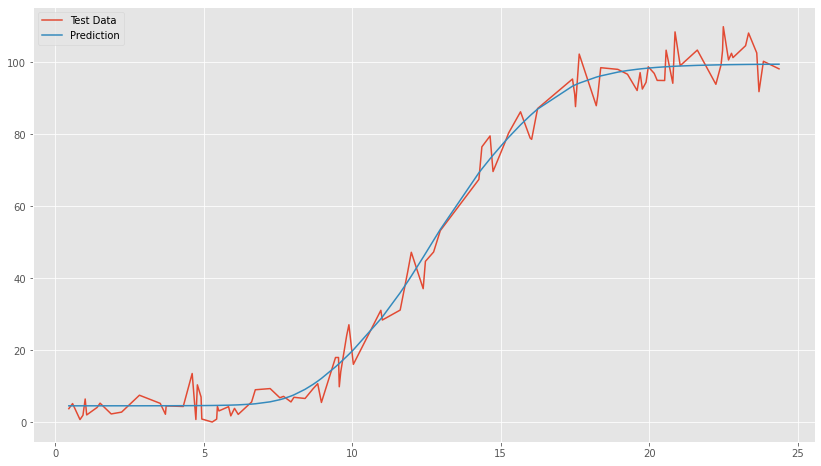

In [9]:
# plot the predictions of the speed and power values
plt.plot(test['Speed'], test['Power'], label='Test Data')
plt.plot(test['Speed'], model.predict(test['Speed']), label='Prediction')
plt.legend();

#### Evaluate the Training Model
With the model trained and the prediction line looking like it closely resembles the test sample provided. We can now perform predictions on a test sample of inputs, to evaluate how the Web API will perform when using the model to make predictions based on provided input windspeeds.

In [10]:
# Provide an array of sample windspeed data
sampleInputs = np.array([1, 2, 3, 4, 5, 12.67, 17.5551, 20.98641, 22.756342, 24.7563524])

# Return an array of power outputs
predictionResults = model.predict(sampleInputs)
predictionResults

array([[ 4.619242 ],
       [ 4.6219196],
       [ 4.6280923],
       [ 4.6435146],
       [ 4.6873064],
       [49.689766 ],
       [93.93445  ],
       [98.98697  ],
       [99.38825  ],
       [99.52643  ]], dtype=float32)

In [11]:
# save the trained model
model.save("powermodel.h5")

## Conclusion
The model would appear to exhibit good prediction capabilities on the sample provided. I believe the accuracy of the model could be potentially improved by providing a much larger data set and developing a deep neural network with multiple layers. However, given that the power generated is being based on a single input parameter, it might not yield a significant improvement over a relatively shallow network using a small data set.

In [12]:
# End